In [1]:
# I noticed on some of Ian's images that the lattice wasn't being completely masked.
# I suspect the reason is the search is missing those points because we aren't extending the grid to cover
# The whole image.

# OR

# The problem could be that I am not completely masking a point.

In [2]:
# I need a way to look at the power spectrum of an image after subtraction. Let's pick an example and take
# it to that point.

# Copy/paste some parameters from mask_pbsapo_micrographs.ipynb

In [1]:
import saxtal_functions as sax
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm, trange
import os
from funcs_mrcio import iwrhdr_opened, irdhdr_opened, iwrsec_opened, irdsec_opened
from itertools import product

In [2]:
from PIL import Image

In [3]:
threshold_method='sd' 
pixel_size = 1.048
verbose=True
show_plots=True
threads=16
sigma=15 
num_sd=3.0
num_sd_secondpass=2.0
x_window_percent=(0, 0.7)
y_window_percent=(0, 1)
miller_index_buffer=10
box_radius=10
min_lattice_size=8
mask_hotpixels=False
mask_radius=4
replace_distance_percent=0.05
return_spots=False
return_stats=False
return_image=False



In [4]:
filename = 'test_data/test_lattice.mrc'
filename_out = 'test_data/test_lattice_masked.mrc'

In [5]:
image, header = sax.import_mrc(filename)

In [6]:
padded_fft = sax.scipy_fft(image, verbose, threads)

scipy_fft(): FFT performed in 158.6 milliseconds.


scipy_fft(): FFT performed in 146.99 milliseconds.
Number of first-pass spots found: 97


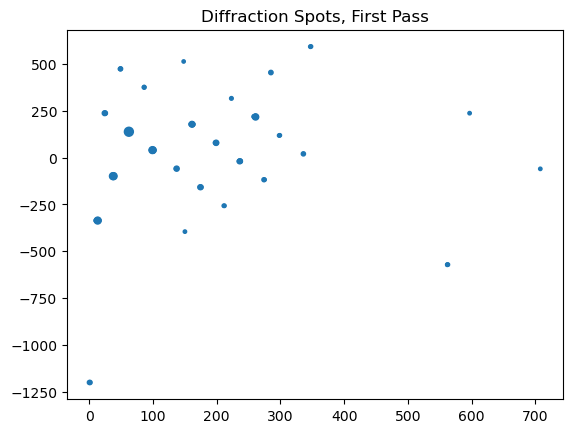

Starting basis: [[138 -99]
 [ 62  37]]
Starting basis size: 34058
------------------------------------
Running basis shortening...
The angle between the basis vectors is: 135.31419624284092
[138  62] is larger than [-99  37]
The updated basis vectors are [39 99][-99  37]
This run resulted in a basis smaller than the last: 22492
The updated basis vectors are: [[ 39 -99]
 [ 99  37]]
------------------------------------
Running basis shortening...
The angle between the basis vectors is: 91.00883955417763
[39 99] is larger than [-99  37]
The updated basis vectors are [-60 136][-99  37]
This run resulted in a basis larger than the last: 33266
Terminating loop.
------------------------------------


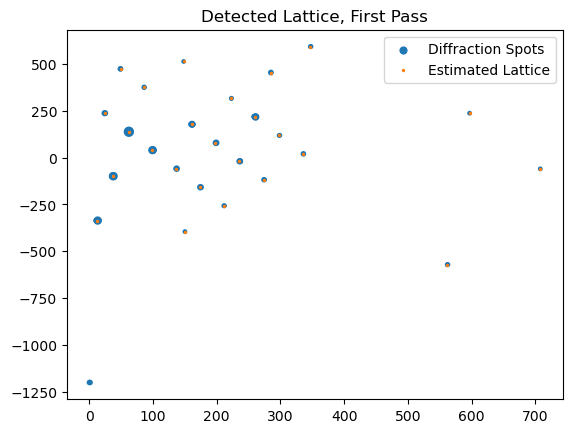

Starting basis: [[ 39 -99]
 [ 99  37]]
Refined_basis: [[ 39.45051841 -98.70463599]
 [ 99.36508744  37.48987202]]
Unit cell dimensions (A): 56.46 57.17
Highest resolution spot (A): 7.53


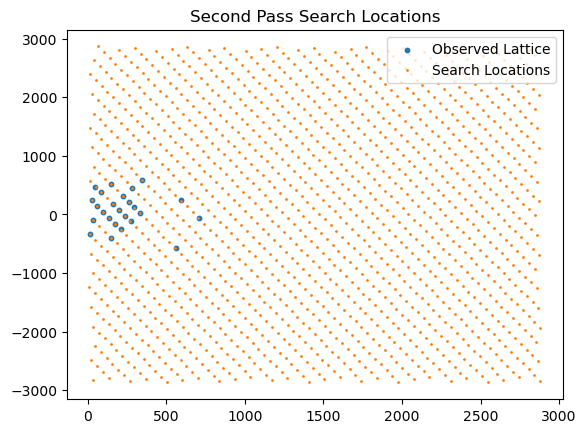

/home/rk/anaconda3/envs/saxtal/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/rk/anaconda3/envs/saxtal/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/rk/anaconda3/envs/saxtal/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/rk/anaconda3/envs/saxtal/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/rk/anaconda3/envs/saxtal/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


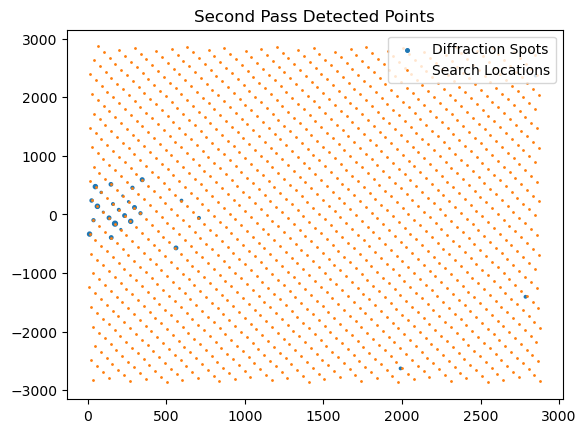

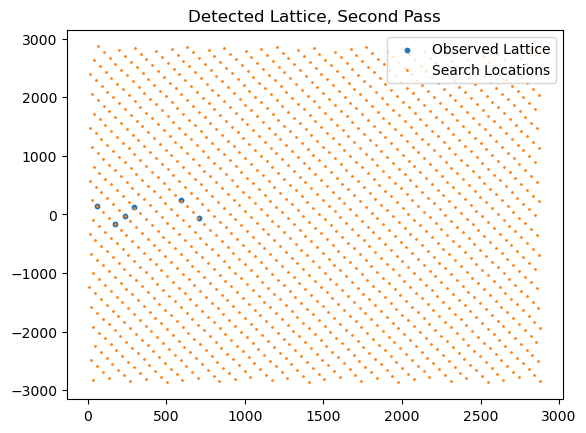

Highest resolution spot from second pass (A): 8.5


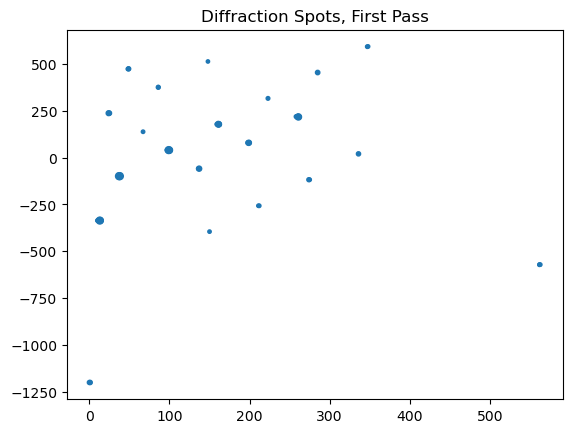

Starting basis: [[-99  39]
 [ 37  99]]
Starting basis size: 22492
------------------------------------
Running basis shortening...
The angle between the basis vectors is: 91.00883955417763
[39 99] is larger than [-99  37]
The updated basis vectors are [-60 136][-99  37]
This run resulted in a basis larger than the last: 33266
Terminating loop.
------------------------------------


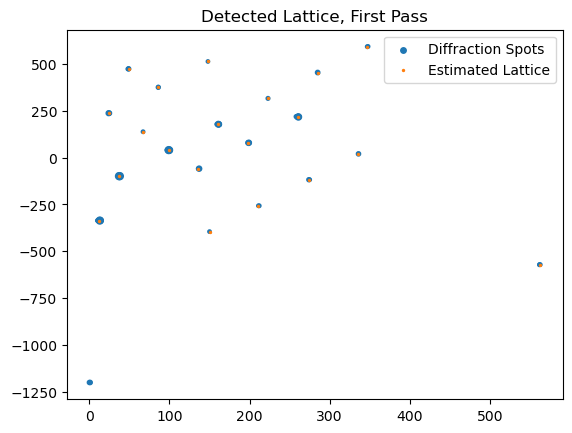

Starting basis: [[-99  39]
 [ 37  99]]
Refined_basis: [[-98.68276476  39.4878671 ]
 [ 37.50080095  99.43334322]]
Unit cell dimensions (A): 57.18 56.42
Highest resolution spot (A): 7.53


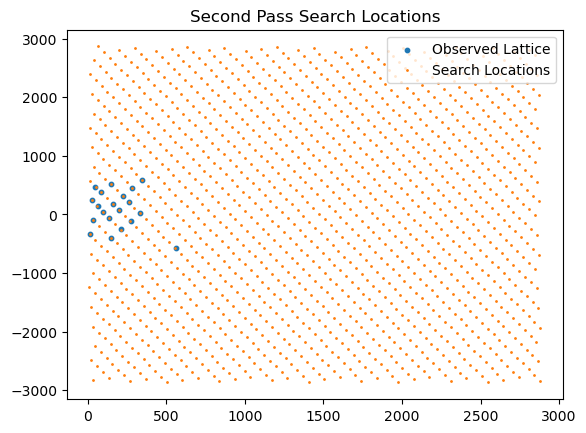

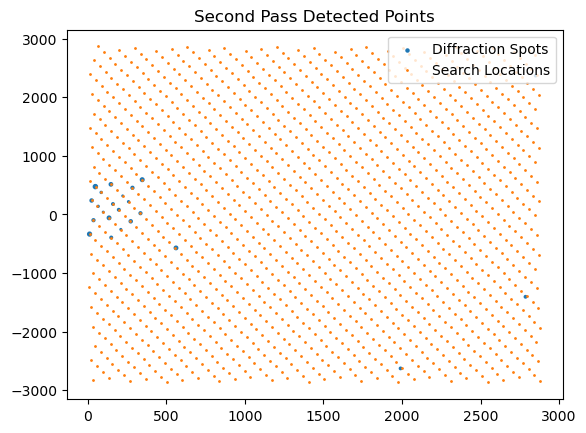

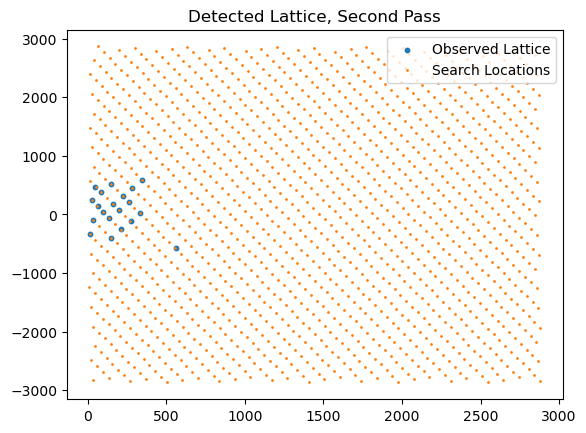

Highest resolution spot from second pass (A): 7.53


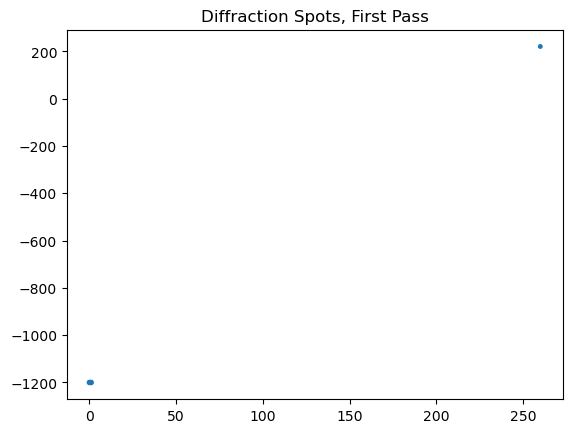

Lattice has less than 8 candidate basis vectors during first pass. Terminating function.
scipy_ifft(): iFFT performed in 124.29 milliseconds.
Export complete!
test_data/test_lattice.mrc masked successfully!


In [7]:
sax.mask_image(filename,
               filename_out,
               threshold_method = threshold_method,
               pixel_size = pixel_size,
               verbose = verbose,
               show_plots = show_plots,
               threads = threads,
               sigma = sigma,
               num_sd = num_sd,
               num_sd_secondpass = num_sd_secondpass,
               x_window_percent = x_window_percent,
               y_window_percent = y_window_percent,
               miller_index_buffer = miller_index_buffer,
               box_radius = box_radius,
               min_lattice_size = min_lattice_size,
               mask_radius= mask_radius,
               replace_distance_percent = replace_distance_percent,
               return_spots = False,
               return_stats = False,
               return_fft = False,
               return_image = False)

scipy_fft(): FFT performed in 149.29 milliseconds.
Number of first-pass spots found: 81


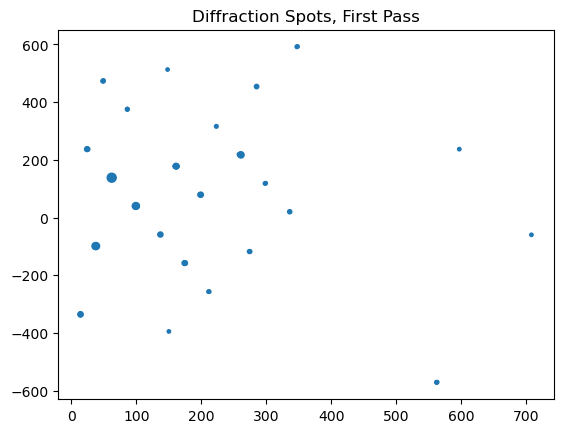

Starting basis: [[138  40]
 [ 62 100]]
Starting basis size: 34488
------------------------------------
Running basis shortening...
The angle between the basis vectors is: 44.00538152635942
[138  62] is larger than [ 40 100]
The updated basis vectors are [ 98 -38][ 40 100]
This run resulted in a basis smaller than the last: 22648
The updated basis vectors are: [[-98  40]
 [ 38 100]]
------------------------------------
Running basis shortening...
The angle between the basis vectors is: 90.60735300480954
[ 40 100] is larger than [-98  38]
The updated basis vectors are [-58 138][-98  38]
This run resulted in a basis larger than the last: 33456
Terminating loop.
------------------------------------


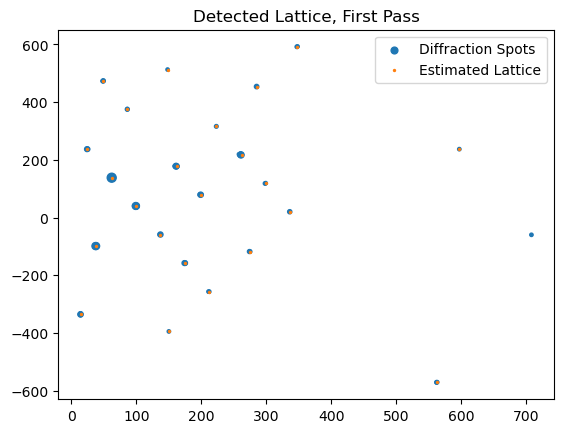

Starting basis: [[-98  40]
 [ 38 100]]
Refined_basis: [[-98.57331176  39.56008999]
 [ 37.70683191  99.58215258]]
Unit cell dimensions (A): 57.2 56.34
Highest resolution spot (A): 7.53


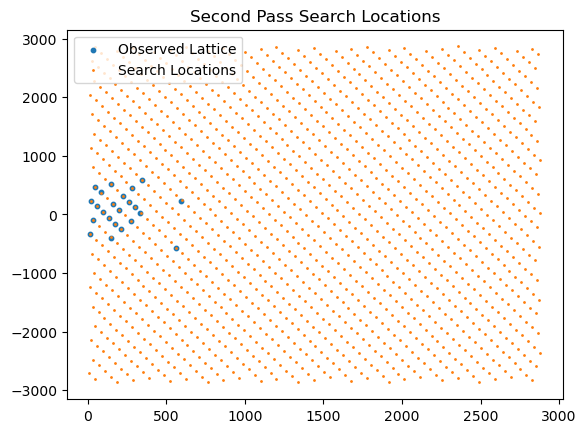

/home/rk/anaconda3/envs/saxtal/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/rk/anaconda3/envs/saxtal/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/rk/anaconda3/envs/saxtal/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/rk/anaconda3/envs/saxtal/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/rk/anaconda3/envs/saxtal/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


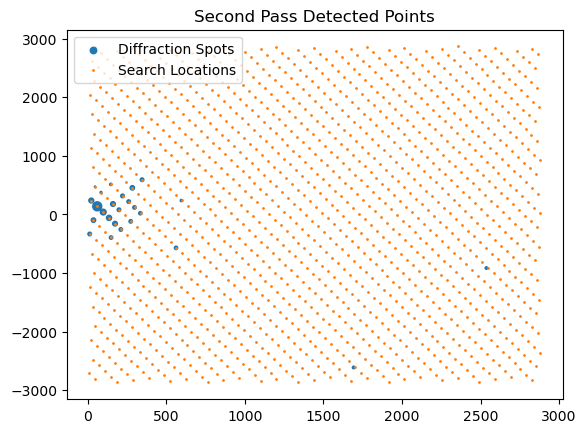

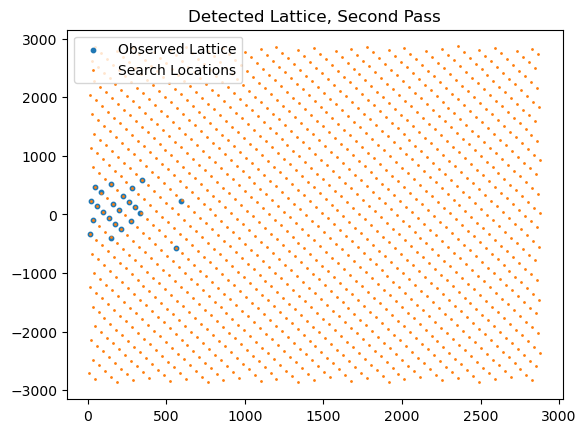

Highest resolution spot from second pass (A): 7.53


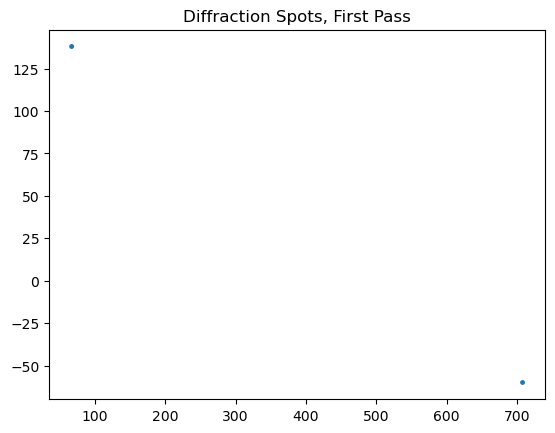

Lattice has less than 8 candidate basis vectors during first pass. Terminating function.


In [6]:
masked_fft = sax.mask_image(filename,
               filename_out,
               threshold_method = threshold_method,
               pixel_size = pixel_size,
               verbose = verbose,
               show_plots = show_plots,
               threads = threads,
               sigma = sigma,
               num_sd = num_sd,
               num_sd_secondpass = num_sd_secondpass,
               x_window_percent = x_window_percent,
               y_window_percent = y_window_percent,
               miller_index_buffer = miller_index_buffer,
               box_radius = box_radius,
               min_lattice_size = min_lattice_size,
               mask_radius= mask_radius,
               replace_distance_percent = replace_distance_percent,
               return_spots = False,
               return_stats = False,
               return_fft = True,
               return_image = False)

In [ ]:
# Generate a 

<Figure size 6000x6000 with 0 Axes>

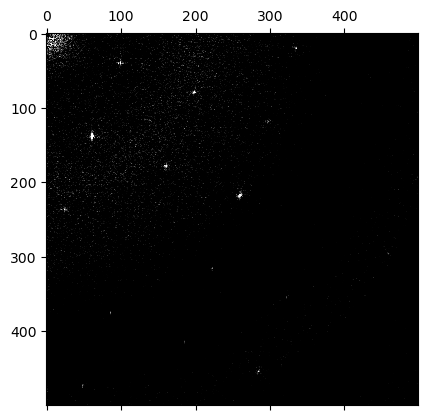

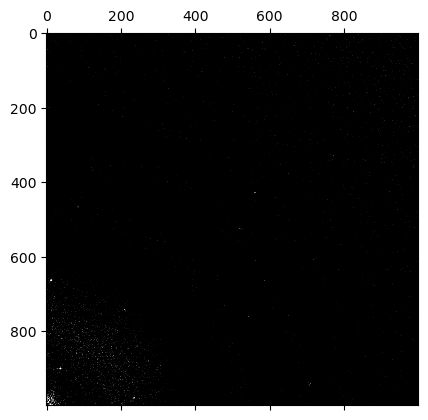

In [76]:
from matplotlib.pyplot import figure
figure(figsize=(20, 20), dpi=300)
# Display the unmasked power spectrum



plt.matshow(np.abs(padded_fft)[:500, :500],
           cmap = "Greys_r",
           vmax = 5000,
           vmin = 1000)

plt.matshow(np.abs(padded_fft)[-1000:, :1000],
           cmap = "Greys_r",
           vmax = 5000,
           vmin = 1000)

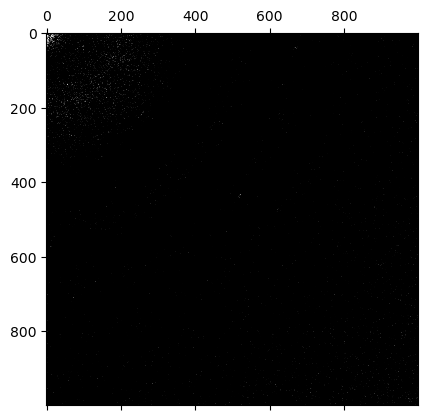

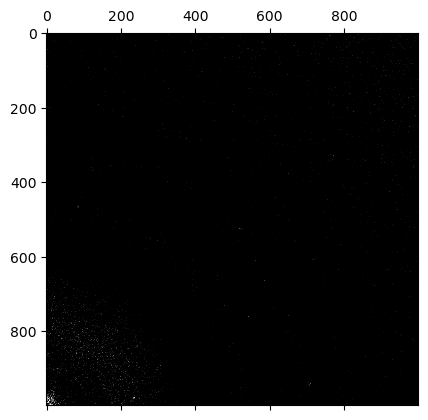

In [41]:
# Display the masked power spectrum

plt.matshow(np.abs(masked_fft)[:1000, :1000],
           cmap = "Greys_r",
           vmax = 5000,
           vmin = 1000)

plt.matshow(np.abs(masked_fft)[-1000:, :1000],
           cmap = "Greys_r",
           vmax = 5000,
           vmin = 1000)

In [8]:
image, header = sax.import_mrc(filename)
padded_fft = sax.scipy_fft(image, verbose, threads)
log_diff_spectrum, smoothed_spectrum = sax.generate_diff_spectrum(padded_fft, sigma)
diffraction_indices, diffraction_amplitudes = sax.find_diffraction_spots_sd(log_diff_spectrum, num_sd, x_window_percent, y_window_percent)
if verbose:
        print("Number of first-pass spots found: " + str(diffraction_indices.shape[1]))

scipy_fft(): FFT performed in 144.84 milliseconds.
Number of first-pass spots found: 97


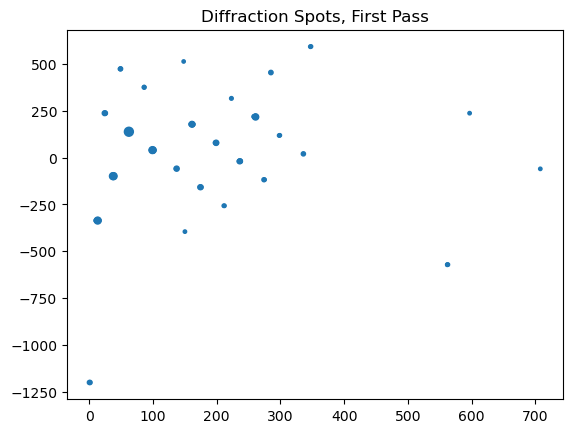

Starting basis: [[138 -99]
 [ 62  37]]
Starting basis size: 34058
------------------------------------
Running basis shortening...
The angle between the basis vectors is: 135.31419624284092
[138  62] is larger than [-99  37]
The updated basis vectors are [39 99][-99  37]
This run resulted in a basis smaller than the last: 22492
The updated basis vectors are: [[ 39 -99]
 [ 99  37]]
------------------------------------
Running basis shortening...
The angle between the basis vectors is: 91.00883955417763
[39 99] is larger than [-99  37]
The updated basis vectors are [-60 136][-99  37]
This run resulted in a basis larger than the last: 33266
Terminating loop.
------------------------------------


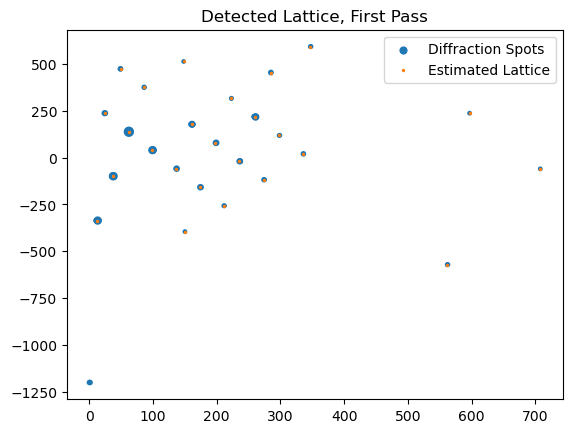

Starting basis: [[ 39 -99]
 [ 99  37]]
Refined_basis: [[ 39.45051841 -98.70463599]
 [ 99.36508744  37.48987202]]
Unit cell dimensions (A): 56.46 57.17
Highest resolution spot (A): 7.53


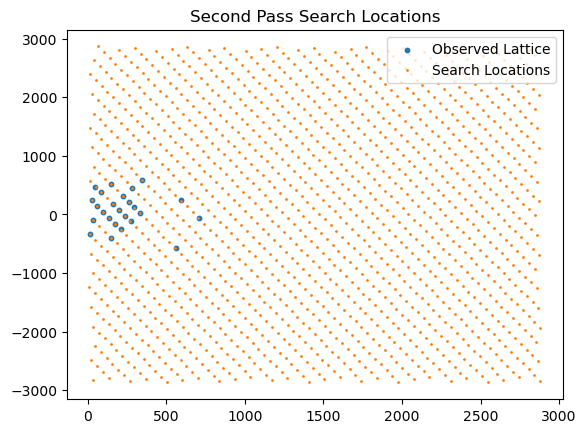

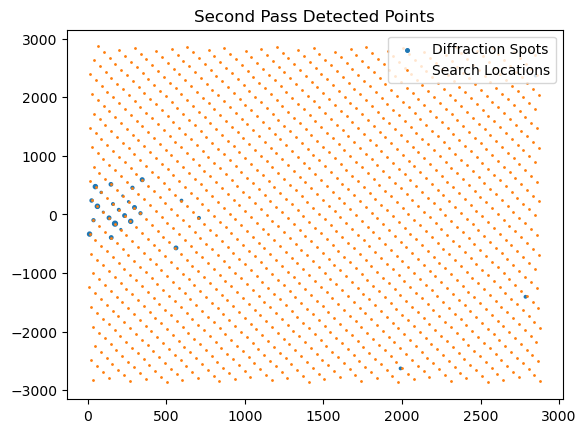

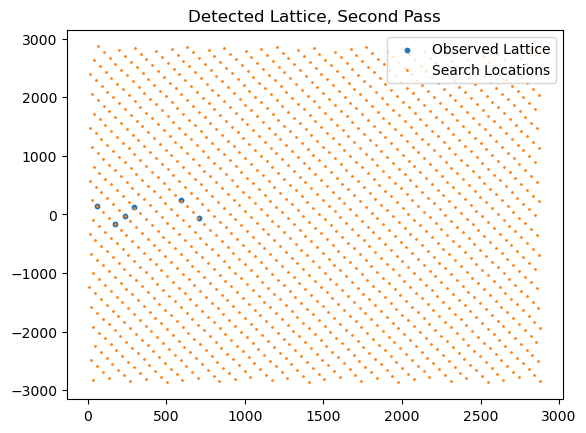

Highest resolution spot from second pass (A): 8.5


In [9]:
combined_nonredundant_lattice, unit_cell_dimensions, highest_resolution = sax.find_lattice(diffraction_indices, 
                                                                                           diffraction_amplitudes, 
                                                                                           log_diff_spectrum,
                                                                                           pixel_size,
                                                                                           show_plots=show_plots,
                                                                                           verbose=verbose, 
                                                                                           num_sd_secondpass=num_sd_secondpass, 
                                                                                           miller_index_buffer=miller_index_buffer,
                                                                                           box_radius=box_radius,
                                                                                           min_lattice_size=min_lattice_size)

In [6]:
# Store the results in arrays
unit_cell_dimensions_array = np.array(unit_cell_dimensions)
highest_resolution_array = np.array([highest_resolution])

In [7]:
combined_nonredundant_lattice_2lat = 1

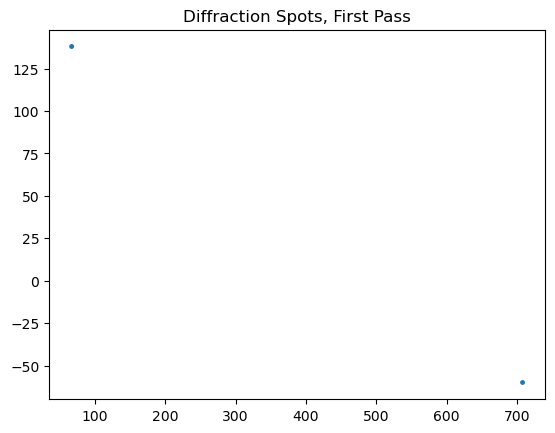

Lattice has less than 8 candidate basis vectors during first pass. Terminating function.


In [9]:
# While find_lattice has returned something:
while combined_nonredundant_lattice_2lat is not None:

    # Filter out the hot pixels - leave off, depreciated
    if mask_hotpixels:
        if verbose: print("Removing hot pixels...")
        combined_nonredundant_lattice = combined_nonredundant_lattice[remove_hotpixels(combined_nonredundant_lattice, verbose)]
        if verbose: print(str(num_spots - combined_nonredundant_lattice.shape[0]) + " hot pixels removed.")

    # Generate the mask indices
    mask_indices_array = sax.generate_lattice_mask_indices(combined_nonredundant_lattice, mask_radius)

    # Replace the diffraction spots
    masked_fft = sax.replace_diffraction_spots(padded_fft, mask_indices_array, log_diff_spectrum, smoothed_spectrum, replace_distance_percent)

    # Generate the diff spectrum again
    log_diff_spectrum, smoothed_spectrum = sax.generate_diff_spectrum(masked_fft, sigma)

    # Threshold again
    diffraction_indices, diffraction_amplitudes = sax.find_diffraction_spots_sd(log_diff_spectrum, num_sd, x_window_percent, y_window_percent)

    # Look for another lattice
    combined_nonredundant_lattice_2lat, unit_cell_dimensions, highest_resolution = sax.find_lattice(diffraction_indices, 
                                                                                       diffraction_amplitudes, 
                                                                                       log_diff_spectrum,
                                                                                       pixel_size,
                                                                                       show_plots=show_plots,
                                                                                       verbose=verbose, 
                                                                                       num_sd_secondpass=num_sd_secondpass, 
                                                                                       miller_index_buffer=miller_index_buffer,
                                                                                       box_radius=box_radius,
                                                                                       min_lattice_size=min_lattice_size)

    # If another lattice was found
    if combined_nonredundant_lattice_2lat is not None:
        # Combine the suspected lattice points across all lattices
        combined_nonredundant_lattice = np.hstack((combined_nonredundant_lattice, combined_nonredundant_lattice_2lat))
        # Append information about the current lattice
        unit_cell_dimensions_array = np.vstack((unit_cell_dimensions_array, unit_cell_dimensions))
        highest_resolution_array = np.append(highest_resolution_array, highest_resolution)